In [19]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

def load_image(file,frame = 1):
    
    data = pd.read_csv(file,header=None,names = ['x','y','_','height'])
    
    
    return data


def load_spec(file):
    
    data = pd.read_csv(file,header = None,names = ('wl','_','_','counts'))
    
    return data

def plot_1order(data,vmin = 100,vmax = 200):
    ydim = data.y.max() - data.y.min() + 1
    xdim = len(data)//ydim
    fig, ax = plt.subplots()
    ax.imshow(data.height.values.reshape((ydim,xdim)),vmin = vmin,vmax = vmax)
    xtks = data.x[ax.get_xticks()[:-1].astype('int') + vmin]
    ax.set_xticklabels(xtks)
    plt.show()
    
    return

def rotate_coords(coords,angle):
    
    x,y = coords
    c,s = np.cos(angle),np.sin(angle)
    
    return c*x - s*y, s*x + c*y

def integ_1order(data):
    
    return data.groupby('x').sum()

def crop_image(data,xs,ys):
    
    data = data[data.x > xs[0]]
    data = data[data.x < xs[1]]
    data = data[data.y < ys[1]]
    data = data[data.y > ys[0]]
    
    return data


path = "/Users/adamcraycraft/Desktop/Research/data/20190510/raw/"

In [26]:
im_8_1 = load_image(path + 'exp4_8.txt') #window only 610 10s
im_68_0 = load_image(path + 'exp4_68.txt')
im_69_1 = load_image(path + 'exp4_69.txt')
im_71_1 = load_image(path + 'exp4_71.txt') #laser
im_72_1 = load_image(path + 'exp4_72.txt') #barium deposit
im_78_1 = load_image(path + 'exp4_78.txt') #xenon only
im_73_0 = load_image(path + 'exp4_73.txt')

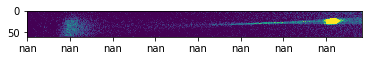

In [27]:
im_72_1 = im_72_1[im_72_1.x >= 560]
im_72_1 = im_72_1[im_72_1.x <= 700]
im_72_1 = im_72_1[im_72_1.y >= 110]
im_72_1 = im_72_1[im_72_1.y <= 170]
plot_1order(im_72_1,100,160)


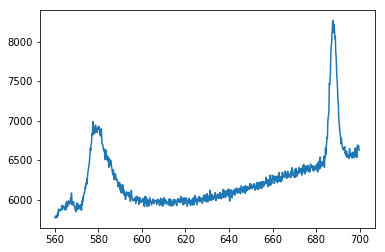

In [28]:
spec_72 = integ_1order(im_72_1)
plt.plot(spec_72.index,spec_72.height)
plt.show()

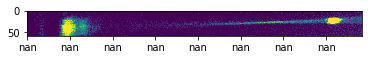

In [29]:
im_78_1 = crop_image(im_78_1,(560,700),(110,170))
plot_1order(im_78_1,100,160)

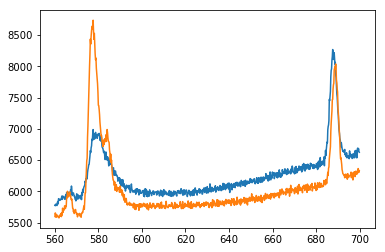

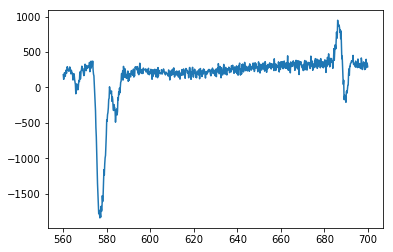

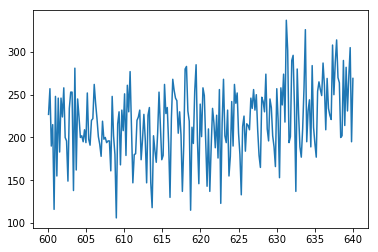

In [30]:
spec_78 = integ_1order(im_78_1)
plt.plot(spec_72.index,spec_72.height)
plt.plot(spec_78.index,spec_78.height)
plt.show()
plt.plot(spec_72.index, spec_72.height - spec_78.height)
plt.show()
plt.plot(spec_72[600:640].index, spec_72.height[600:640] - spec_78.height[600:640])
plt.show()

array([   0,  200,  400,  600,  800, 1000, 1200, 1400])

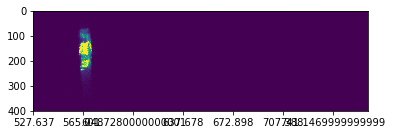

             y    _  height
x                          
560.040  80200  400   39081
560.226  80200  400   39299
560.411  80200  400   39143
560.597  80200  400   39331
560.783  80200  400   39136
560.968  80200  400   39588
561.154  80200  400   39744
561.339  80200  400   40149
561.525  80200  400   40127
561.711  80200  400   40846
561.896  80200  400   42703
562.082  80200  400   47802
562.267  80200  400   51536
562.453  80200  400   58834
562.638  80200  400   68151
562.824  80200  400   65922
563.009  80200  400   69628
563.195  80200  400   81125
563.380  80200  400   85999
563.565  80200  400   96796
563.751  80200  400   95239
563.936  80200  400  101704
564.121  80200  400  107693
564.307  80200  400  107678
564.492  80200  400  111962
564.677  80200  400  111317
564.862  80200  400  109658
565.048  80200  400  111342
565.233  80200  400  120203
565.418  80200  400  161947
565.603  80200  400  217429
565.788  80200  400  213637
565.974  80200  400  214738
566.159  80200  400 

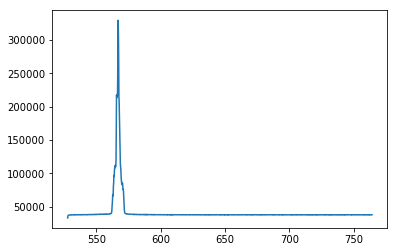

In [17]:
plot_1order(im_71_1,100,700)
spec_71 = integ_1order(im_71_1)
plt.plot(spec_71.index,spec_71.height)
print(spec_71[560:570])
plt.show()

,x,y,_,height
0,504.925530,-153.140502,1,80
1,505.106290,-153.195700,1,82
2,505.287050,-153.250897,1,88
3,505.466854,-153.305803,1,90
4,505.647614,-153.361000,1,82


In [113]:
im_72_1.x,im_72_1.y = rotate_coords((im_72_1.x,im_72_1.y),6.28-.2)

In [112]:
np.arctan(25/123.)

0.20052054967741431